In [5]:
import pandas as pd
from PIL import Image
from wordcloud import WordCloud
import numpy as np

import matplotlib.pyplot as plt

In [6]:
df_China = pd.read_excel("China.xlsx", encoding = "latin-1")
df_USA = pd.read_excel("USA.xlsx", encoding = "latin-1")

In [8]:
df_USA.head() # data missing in the third row

,Product/Sector,2013,2014,2015,2016,2017,2018
0,MT2 - 01 - Animal products,3.856538e+07,6.604528e+07,4.874630e+07,62085436,51050392,61222286
1,MT2 - 02 - Dairy products,NaN,NaN,NaN,7000,92943,2875
2,"MT2 - 03 - Fruits, vegetables, plants",1.663788e+09,1.580770e+09,1.734687e+09,1799138343,1839081178,1925642718
3,"MT2 - 04 - Coffee, tea",1.612766e+08,1.515951e+08,1.742167e+08,195637760,198490465,198990541
4,MT2 - 05 - Cereals and preparations,3.912899e+08,4.052160e+08,4.365365e+08,464650405,540211211,690050676


Since the other values are abnormally small, this row is not valueble. Other methods could be useful to make up for this.

In [10]:
df_USA.drop(index=1, inplace=True)

In [11]:
# A function which computes the frequency of words
def freq(df):
    
    # Feature Engineering 
    df["Product/Sector"] = df["Product/Sector"].apply(lambda x: x[11:])
    df["freq"] =df.iloc[:,1:].mean(axis=1)
    
    # Compute frequency
    freq = {}
    for i in range(len(df)):
        word = df.iloc[i][0]
        mean = df.iloc[i][-1]
        freq[word] = mean
    return freq

In [12]:
China_goods = freq(df_China)
USA_goods = freq(df_USA)

In [15]:
# define a function which generates the word cloud to the frequency in the shape of a country symbol
def Word_Cloud(symbol, freq):
    
    # Mask the shape of word cloud
    mask = np.array(Image.open(symbol))
    wc = WordCloud(background_color="white", repeat = True, max_words=1000, mask=mask, contour_width=1, contour_color='black').generate_from_frequencies(freq)

    # Plot
    plt.figure(figsize=[20,10])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

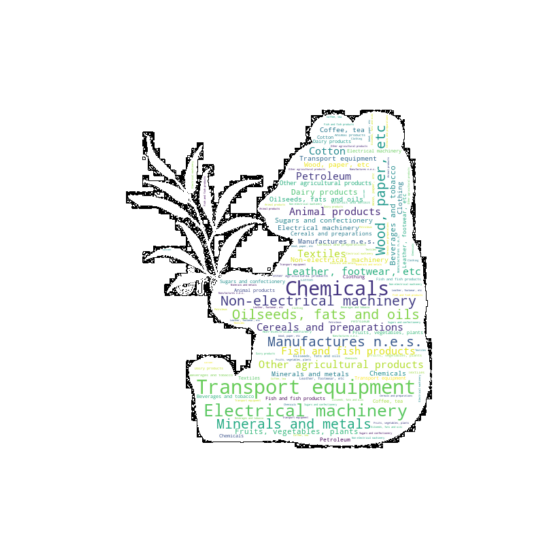

In [19]:
Word_Cloud("panda.jpg", China_goods)

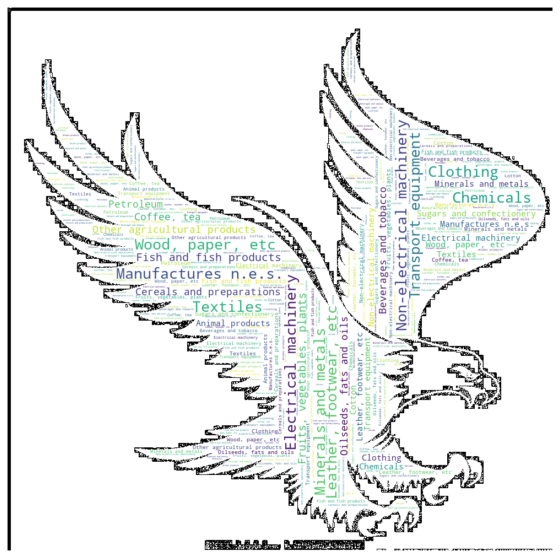

In [18]:
Word_Cloud("eagle.jpg", USA_goods)